In [1]:
#Set Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress
from citipy import citipy 


In [2]:
#Setup Cont'd.
api_key = "3e02a6feb01f5643b1aea89d3737b241"

base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#Lat Lng Info
lat_lngs = []
countries = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

#Countries       
len(countries)

#Cities
len(cities)
      

613

In [4]:
#DF
data_weather = pd.DataFrame({'Country' : countries,'City': cities, 'Cloudiness': "", 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

data_weather.head()

,Country,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,MM,ye,,,,,,,
1,GL,upernavik,,,,,,,
2,MV,hithadhoo,,,,,,,
3,US,kapaa,,,,,,,
4,AU,port lincoln,,,,,,,


In [5]:
#Variables 
number_info = 1
set_info = 1

#URL Info
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#API
print('''
-----------------------------
Beginning 
-----------------------------''')
for index, row in data_weather.iterrows(): 
    
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + api_key
    
    
    response = requests.get(query_url).json()
    
 
    try: 
        
        print(f'Processing Weather Data for Record {number_info} of Set {set_info} | {response["name"]}')
        
        #Input Data In DF
        data_weather.loc[index, 'Lat'] = response['coord']['lat']
        data_weather.loc[index, 'Lng'] = response['coord']['lon']
        data_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        data_weather.loc[index, 'Date'] = response['dt']
        data_weather.loc[index, 'Humidity'] = response['main']['humidity']
        data_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        data_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
      #Increase
        number_info += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
  
    if number_info == 51:
        set_info += 1
        number_info = 1
        time.sleep(60)
        
print('''
-----------------------------
End
-----------------------------''')
   



-----------------------------
Beginning 
-----------------------------
City not found....Skipping............
Processing Weather Data for Record 1 of Set 1 | Upernavik
Processing Weather Data for Record 2 of Set 1 | Hithadhoo
Processing Weather Data for Record 3 of Set 1 | Kapaa
Processing Weather Data for Record 4 of Set 1 | Port Lincoln
Processing Weather Data for Record 5 of Set 1 | Kaitangata
Processing Weather Data for Record 6 of Set 1 | Ngorongoro
Processing Weather Data for Record 7 of Set 1 | La Grande
Processing Weather Data for Record 8 of Set 1 | Punta Arenas
Processing Weather Data for Record 9 of Set 1 | Castro
Processing Weather Data for Record 10 of Set 1 | Cape Town
City not found....Skipping............
Processing Weather Data for Record 11 of Set 1 | Arraial do Cabo
Processing Weather Data for Record 12 of Set 1 | Necochea
City not found....Skipping............
Processing Weather Data for Record 13 of Set 1 | Hirara
Processing Weather Data for Record 14 of Set 1 | Y

City not found....Skipping............
Processing Weather Data for Record 30 of Set 3 | Mörön
Processing Weather Data for Record 31 of Set 3 | Constitucion
Processing Weather Data for Record 32 of Set 3 | Pundaguitan
City not found....Skipping............
Processing Weather Data for Record 33 of Set 3 | Salinas
Processing Weather Data for Record 34 of Set 3 | Conceição do Araguaia
Processing Weather Data for Record 35 of Set 3 | Staraya Poltavka
Processing Weather Data for Record 36 of Set 3 | Victoria
Processing Weather Data for Record 37 of Set 3 | Dunedin
City not found....Skipping............
Processing Weather Data for Record 38 of Set 3 | Edd
City not found....Skipping............
Processing Weather Data for Record 39 of Set 3 | Caravelas
Processing Weather Data for Record 40 of Set 3 | Chimbote
City not found....Skipping............
Processing Weather Data for Record 41 of Set 3 | Nemuro
Processing Weather Data for Record 42 of Set 3 | Carnarvon
Processing Weather Data for Recor

Processing Weather Data for Record 9 of Set 6 | Soyo
Processing Weather Data for Record 10 of Set 6 | Cabrero
Processing Weather Data for Record 11 of Set 6 | Tilichiki
City not found....Skipping............
Processing Weather Data for Record 12 of Set 6 | Gorom-Gorom
Processing Weather Data for Record 13 of Set 6 | Custoias
City not found....Skipping............
Processing Weather Data for Record 14 of Set 6 | Ketchikan
City not found....Skipping............
Processing Weather Data for Record 15 of Set 6 | Sitka
Processing Weather Data for Record 16 of Set 6 | Balabac
Processing Weather Data for Record 17 of Set 6 | Ahipara
Processing Weather Data for Record 18 of Set 6 | Mahajanga
Processing Weather Data for Record 19 of Set 6 | Tairua
Processing Weather Data for Record 20 of Set 6 | Maniitsoq
Processing Weather Data for Record 21 of Set 6 | Cururupu
Processing Weather Data for Record 22 of Set 6 | Luanda
Processing Weather Data for Record 23 of Set 6 | San Andrés
Processing Weather 

Processing Weather Data for Record 43 of Set 8 | Alice Springs
Processing Weather Data for Record 44 of Set 8 | Palaia Fokaia
Processing Weather Data for Record 45 of Set 8 | Natal
Processing Weather Data for Record 46 of Set 8 | Örnsköldsvik
Processing Weather Data for Record 47 of Set 8 | Clarksburg
Processing Weather Data for Record 48 of Set 8 | Bhadravati
Processing Weather Data for Record 49 of Set 8 | Pareora
Processing Weather Data for Record 50 of Set 8 | Lakatoro
Processing Weather Data for Record 1 of Set 9 | Rabo de Peixe
Processing Weather Data for Record 2 of Set 9 | Srednekolymsk
Processing Weather Data for Record 3 of Set 9 | Huarmey
Processing Weather Data for Record 4 of Set 9 | Banamba
Processing Weather Data for Record 5 of Set 9 | Bandar-e Lengeh
Processing Weather Data for Record 6 of Set 9 | Cunduacán
Processing Weather Data for Record 7 of Set 9 | Kwekwe
Processing Weather Data for Record 8 of Set 9 | Viedma
Processing Weather Data for Record 9 of Set 9 | Parit 

Processing Weather Data for Record 24 of Set 11 | Bilma
Processing Weather Data for Record 25 of Set 11 | Clarksville
Processing Weather Data for Record 26 of Set 11 | Barentu
Processing Weather Data for Record 27 of Set 11 | Petatlán
Processing Weather Data for Record 28 of Set 11 | Staryy Nadym
Processing Weather Data for Record 29 of Set 11 | Dandong
Processing Weather Data for Record 30 of Set 11 | Cooma
Processing Weather Data for Record 31 of Set 11 | Barão de Melgaço
Processing Weather Data for Record 32 of Set 11 | Pedasí
Processing Weather Data for Record 33 of Set 11 | Kalmunai
Processing Weather Data for Record 34 of Set 11 | Harda
Processing Weather Data for Record 35 of Set 11 | Murray Bridge
Processing Weather Data for Record 36 of Set 11 | Saint-Georges
Processing Weather Data for Record 37 of Set 11 | Kondinskoye
Processing Weather Data for Record 38 of Set 11 | Haines Junction
Processing Weather Data for Record 39 of Set 11 | Nazilli
Processing Weather Data for Record 

In [6]:
#Clean Data
data_weather['Max Temp'] = data_weather['Max Temp'].replace('', np.nan)
data_weather = data_weather.dropna()


data_weather.head()

,Country,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
1,GL,upernavik,100,1596491564,91,72.79,-56.15,43.48,7.74
2,MV,hithadhoo,100,1596491564,77,-0.6,73.08,82.42,8.86
3,US,kapaa,40,1596491564,69,22.08,-159.32,82.40,13.87
4,AU,port lincoln,58,1596491565,70,-34.73,135.87,49.14,15.93
5,NZ,kaitangata,100,1596491565,92,-46.28,169.85,48.00,4


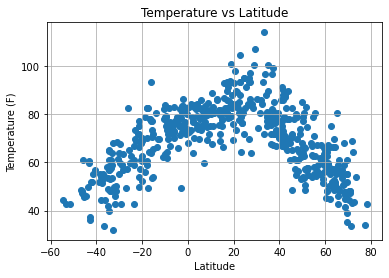

In [7]:
# Temp vs Lat
plt.scatter(data_weather["Lat"], data_weather["Max Temp"], marker="o")

plt.title(f'Temperature vs Latitude')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()

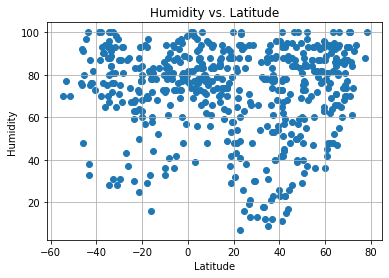

In [8]:
# Humidity vs Lat
plt.scatter(data_weather["Lat"], data_weather["Humidity"], marker="o")

plt.title(f'Humidity vs. Latitude')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()

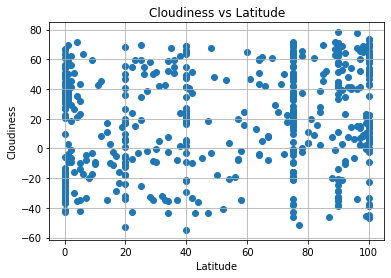

In [9]:
# Cloudiness vs Lat
plt.scatter(data_weather["Cloudiness"], data_weather["Lat"], marker="o")

plt.title(f'Cloudiness vs Latitude')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()

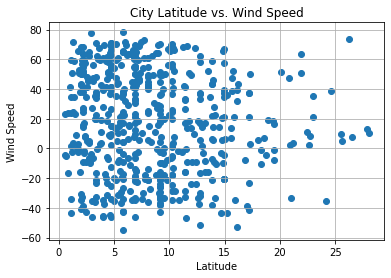

In [10]:
# City Lat vs. Wind Speed
plt.scatter(data_weather["Windspeed"], data_weather["Lat"], marker="o")

plt.title(f'City Latitude vs. Wind Speed')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()

In [31]:
# Location DF
northern_hem = data_weather.loc[data_weather["Lat"] >= 0]
southern_hem = data_weather.loc[data_weather["Lat"] < 0]

In [40]:
#Linear Agression

def linear_agression(xinfo,yinfo):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xinfo, yinfo)
    print(f"The r-squared is: {rvalue}")
    regress_values = xinfo * slope + intercept
    line_eq = "y = " + str